In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
df = pd.read_csv("data/user_visit_duration.csv")

In [9]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


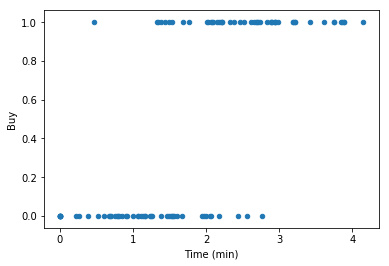

In [10]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [19]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [23]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 110us/step - loss: 0.3899 - acc: 0.8100
Epoch 2/20
100/100 [==============================] - 0s 106us/step - loss: 0.3901 - acc: 0.8500
Epoch 3/20
100/100 [==============================] - 0s 105us/step - loss: 0.3838 - acc: 0.8200
Epoch 4/20
100/100 [==============================] - 0s 85us/step - loss: 0.3766 - acc: 0.8200
Epoch 5/20
100/100 [==============================] - 0s 96us/step - loss: 0.3787 - acc: 0.8300
Epoch 6/20
100/100 [==============================] - 0s 100us/step - loss: 0.3769 - acc: 0.8300
Epoch 7/20
100/100 [==============================] - 0s 111us/step - loss: 0.3816 - acc: 0.8200
Epoch 8/20
100/100 [==============================] - 0s 89us/step - loss: 0.3793 - acc: 0.8300
Epoch 9/20
100/100 [==============================] - 0s 102us/step - loss: 0.3922 - acc: 0.8400
Epoch 10/20
100/100 [==============================] - 0s 116us/step - loss: 0.4072 - acc: 0.8000
Epoch 11/20
100/100 [===========

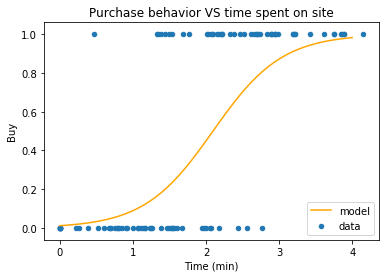

In [38]:
import numpy as np
ax = df.plot(kind='scatter', x='Time (min)', y = 'Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [39]:
temp_class = model.predict(temp) > 0.5

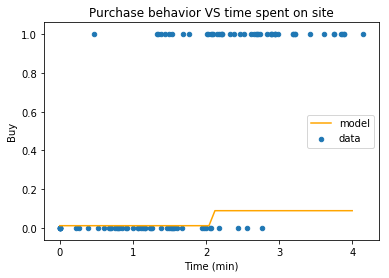

In [40]:
ax = df.plot(kind='scatter', x='Time (min)', y = 'Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp_class), color='orange')
plt.legend(['model', 'data'])

In [41]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [45]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [46]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

model.fit(X_train, y_train, epochs=25, verbose=0)


In [57]:
print("The accuracy train score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The accuracy test score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The accuracy train score is 0.850
The accuracy test score is 0.800
